# Multicollinearity

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
num = ['int64', 'float64']
num_vars = list(df.select_dtypes(include=num))

In [8]:
num_vars

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [9]:
df = df[num_vars]

In [10]:
df.shape

(1460, 38)

In [11]:
df.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [12]:
df.shape

(1460, 38)

In [13]:
df.dropna(inplace=True)

In [14]:
X = df.iloc[:, 1:37]
y = df.iloc[:, -1]

In [15]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [18]:
corrmatrix = X_train.corr()

In [19]:
corrmatrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.373365,-0.190276,0.014251,-0.105789,0.014663,-0.008071,0.046224,-0.057171,-0.078408,...,-0.101711,-0.014741,0.006214,-0.039449,-0.039801,0.003497,-0.002726,-0.053662,0.002031,-0.016855
LotFrontage,-0.373365,1.000000,0.420596,0.252105,-0.038383,0.120351,0.105538,0.203295,0.249217,0.012191,...,0.364330,0.072335,0.161569,-0.015605,0.054766,0.061464,0.203846,0.018122,0.041333,0.026420
LotArea,-0.190276,0.420596,1.000000,0.145355,-0.027863,0.022528,0.016994,0.077379,0.194078,0.171690,...,0.169722,0.072660,0.075159,-0.037523,0.001062,0.041802,0.102577,0.019434,0.013348,-0.006040
OverallQual,0.014251,0.252105,0.145355,1.000000,-0.147098,0.600529,0.584658,0.441108,0.241882,-0.064853,...,0.544133,0.235088,0.374683,-0.147751,0.043201,0.085612,0.084670,-0.063583,0.077596,-0.021838
OverallCond,-0.105789,-0.038383,-0.027863,-0.147098,1.000000,-0.390851,0.053427,-0.159888,-0.039418,0.078553,...,-0.234208,-0.021581,-0.098947,0.052252,0.003765,0.099132,-0.006591,0.089637,-0.045778,0.017240
YearBuilt,0.014663,0.120351,0.022528,0.600529,-0.390851,1.000000,0.648258,0.327696,0.232823,-0.058076,...,0.493885,0.259378,0.266632,-0.387420,0.036824,-0.046956,0.032473,-0.069130,0.013960,-0.014569
YearRemodAdd,-0.008071,0.105538,0.016994,0.584658,0.053427,0.648258,1.000000,0.193305,0.130970,-0.024989,...,0.420655,0.241116,0.278950,-0.189435,0.024659,0.002096,0.021084,-0.026247,0.004994,0.029741
MasVnrArea,0.046224,0.203295,0.077379,0.441108,-0.159888,0.327696,0.193305,1.000000,0.246186,-0.079651,...,0.407250,0.160831,0.152355,-0.123434,0.030731,0.044185,0.037996,-0.043151,0.016933,-0.003551
BsmtFinSF1,-0.057171,0.249217,0.194078,0.241882,-0.039418,0.232823,0.130970,0.246186,1.000000,-0.020668,...,0.288692,0.204427,0.130873,-0.121206,0.025699,0.053995,0.223945,0.011615,-0.025177,0.029664
BsmtFinSF2,-0.078408,0.012191,0.171690,-0.064853,0.078553,-0.058076,-0.024989,-0.079651,-0.020668,1.000000,...,-0.057705,0.018286,-0.031150,0.087648,-0.029214,0.035072,0.071979,0.041856,-0.041137,0.041455


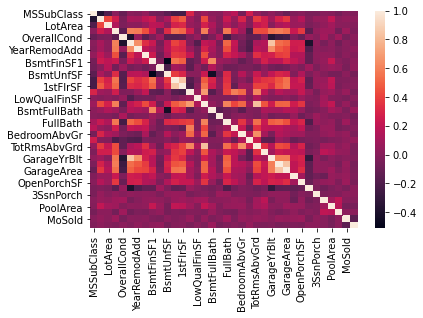

In [20]:
sns.heatmap(corrmatrix)

In [21]:
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [22]:
correlation(X_train, 0.6)

{'1stFlrSF',
 'BsmtFullBath',
 'FullBath',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd'}

In [23]:
corr_feature = correlation(X_train, 0.6)

In [24]:
corr_feature

{'1stFlrSF',
 'BsmtFullBath',
 'FullBath',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd'}

In [25]:
X_train.shape, X_test.shape

((784, 36), (337, 36))

In [26]:
X_train.drop(labels=corr_feature, axis=1, inplace=True)
X_test.drop(labels=corr_feature, axis=1, inplace=True)